In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
apple_stk=pd.read_csv("AAPL.csv")

In [3]:
a = apple_stk
size = int(len(a) * 0.75)
print(size)
Train, Test = a[0:size], a[size:len(a)]

1508


In [4]:
apple_stk['Close']=apple_stk['Close'].astype('float32')

In [5]:
apple_stk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2011 non-null   object 
 1   Open       2011 non-null   float64
 2   High       2011 non-null   float64
 3   Low        2011 non-null   float64
 4   Close      2011 non-null   float32
 5   Adj Close  2011 non-null   float64
 6   Volume     2011 non-null   int64  
dtypes: float32(1), float64(4), int64(1), object(1)
memory usage: 102.2+ KB


In [7]:
X = apple_stk['Close'].values
size = int(len(X) * 0.75)
train, test = X[0:size], X[size:len(X)]

In [11]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
sarima = SARIMAX(train, 
                 order=(0,1,0),
                seasonal_order=(2,0,0,252))
res=sarima.fit(disp=False,low_memory=True)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                 1508
Model:             SARIMAX(0, 1, 0)x(2, 0, 0, 252)   Log Likelihood               -2793.352
Date:                             Fri, 07 Apr 2023   AIC                           5592.704
Time:                                     20:28:55   BIC                           5608.658
Sample:                                          0   HQIC                          5598.646
                                            - 1508                                         
Covariance Type:                            approx                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L252      0.0135      0.029      0.468      0.640      -0.043       0.070
ar.S.L504     -0.0103      0.031     -0.336      0.737      -0.070       0.050
sigma2         2.3851      0.087     27.449      0.000       2.215       2.555
===================================================================================
Ljung-Box (L1) (Q):                   0.84   Jarque-Bera (JB):               869.60
Prob(Q):                              0.36   Prob(JB):                         0.00
Heteroskedasticity (H):               1.35   Skew:                            -0.14
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

In [12]:
spredictions_trn = res.predict(start = Train.index[0],end = Train.index[-1])
spredictions_tst = res.predict(start = Test.index[0],end = Test.index[-1])

In [14]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [15]:
SA_rmse_tr = sqrt(mean_squared_error(train, spredictions_trn))
print('Train RMSE: %.3f' % SA_rmse_tr)
SA_rmse_ts = sqrt(mean_squared_error(test, spredictions_tst))
print('Test RMSE: %.3f' % SA_rmse_ts)

Train RMSE: 2.162
Test RMSE: 40.165


In [16]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
sarima = SARIMAX(train, 
                 order=(0,1,0),
                seasonal_order=(1,1,0,252))
res=sarima.fit(disp=False,low_memory=True)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                 1508
Model:             SARIMAX(0, 1, 0)x(1, 1, 0, 252)   Log Likelihood               -2620.925
Date:                             Fri, 07 Apr 2023   AIC                           5245.850
Time:                                     20:47:21   BIC                           5256.120
Sample:                                          0   HQIC                          5249.710
                                            - 1508                                         
Covariance Type:                            approx                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L252     -0.4624      0.026    -17.466      0.000      -0.514      -0.410
sigma2         3.6349      0.147     24.748      0.000       3.347       3.923
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):               271.08
Prob(Q):                              0.69   Prob(JB):                         0.00
Heteroskedasticity (H):               1.40   Skew:                            -0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

In [17]:
spredictions_trn = res.predict(start = Train.index[0],end = Train.index[-1])
spredictions_tst = res.predict(start = Test.index[0],end = Test.index[-1])

In [18]:
SA_rmse_tr = sqrt(mean_squared_error(train, spredictions_trn))
print('Train RMSE: %.3f' % SA_rmse_tr)
SA_rmse_ts = sqrt(mean_squared_error(test, spredictions_tst))
print('Test RMSE: %.3f' % SA_rmse_ts)

Train RMSE: 2.548
Test RMSE: 25.613


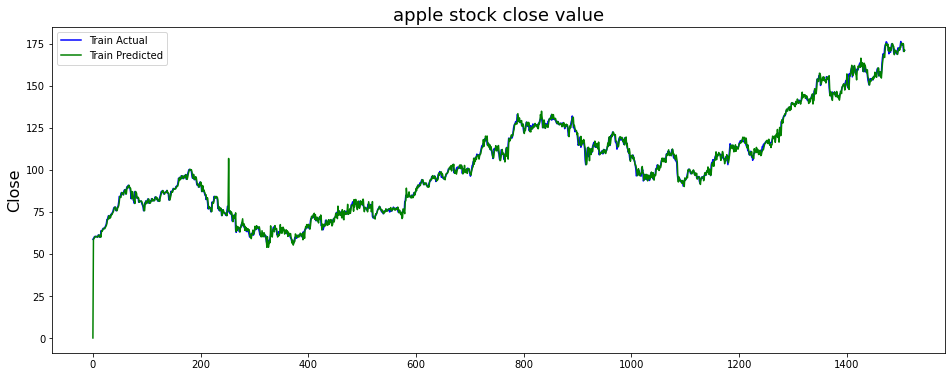

In [19]:
plt.figure(figsize=(16,6))
plt.plot(train, label="Train Actual", color='blue')
plt.plot(spredictions_trn, label="Train Predicted", color='green')
plt.title('apple stock close value', fontsize=18)
plt.ylabel('Close', fontsize=16)
plt.legend()

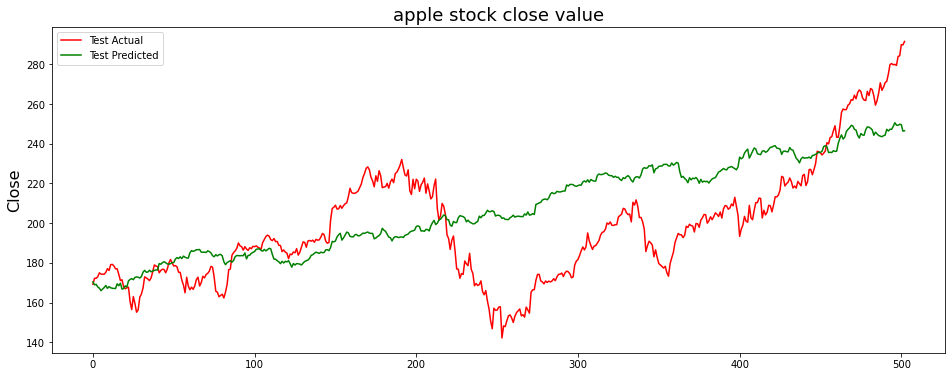

In [20]:
plt.figure(figsize=(16,6))
plt.plot(test, label="Test Actual", color='red')
plt.plot(spredictions_tst, label="Test Predicted", color='green')
plt.title('apple stock close value', fontsize=18)
plt.ylabel('Close', fontsize=16)
plt.legend()

In [21]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
sarima = SARIMAX(train, 
                 order=(0,1,0),
                seasonal_order=(2,1,0,252))
res=sarima.fit(disp=False,low_memory=True)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                 1508
Model:             SARIMAX(0, 1, 0)x(2, 1, 0, 252)   Log Likelihood               -2578.083
Date:                             Fri, 07 Apr 2023   AIC                           5162.165
Time:                                     22:48:26   BIC                           5177.570
Sample:                                          0   HQIC                          5167.955
                                            - 1508                                         
Covariance Type:                            approx                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L252     -0.6273      0.031    -20.048      0.000      -0.689      -0.566
ar.S.L504     -0.3214      0.032     -9.949      0.000      -0.385      -0.258
sigma2         3.2400      0.134     24.208      0.000       2.978       3.502
===================================================================================
Ljung-Box (L1) (Q):                   0.61   Jarque-Bera (JB):               287.97
Prob(Q):                              0.44   Prob(JB):                         0.00
Heteroskedasticity (H):               1.30   Skew:                            -0.15
Prob(H) (two-sided):                  0.01   Kurtosis:                         5.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

In [22]:
spredictions_trn = res.predict(start = Train.index[0],end = Train.index[-1])
spredictions_tst = res.predict(start = Test.index[0],end = Test.index[-1])

In [23]:
SA_rmse_tr = sqrt(mean_squared_error(train, spredictions_trn))
print('Train RMSE: %.3f' % SA_rmse_tr)
SA_rmse_ts = sqrt(mean_squared_error(test, spredictions_tst))
print('Test RMSE: %.3f' % SA_rmse_ts)

Train RMSE: 2.503
Test RMSE: 23.547


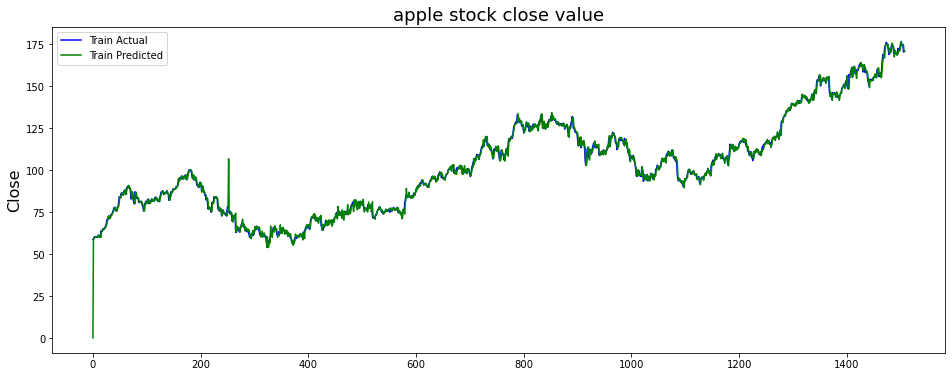

In [24]:
plt.figure(figsize=(16,6))
plt.plot(train, label="Train Actual", color='blue')
plt.plot(spredictions_trn, label="Train Predicted", color='green')
plt.title('apple stock close value', fontsize=18)
plt.ylabel('Close', fontsize=16)
plt.legend()

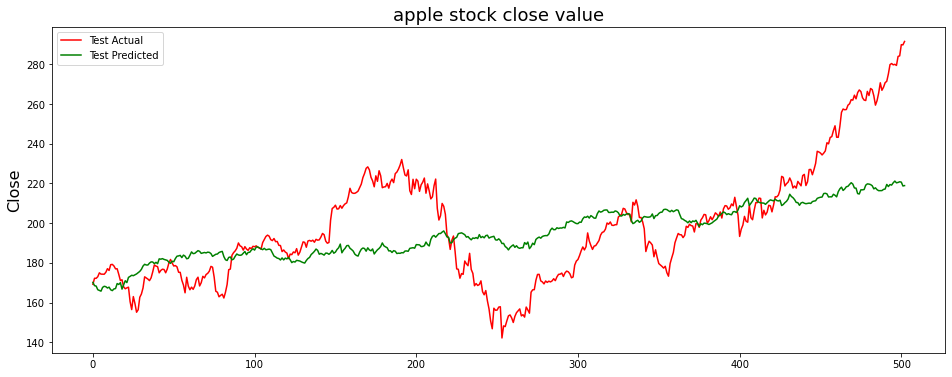

In [25]:
plt.figure(figsize=(16,6))
plt.plot(test, label="Test Actual", color='red')
plt.plot(spredictions_tst, label="Test Predicted", color='green')
plt.title('apple stock close value', fontsize=18)
plt.ylabel('Close', fontsize=16)
plt.legend()

In [26]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
sarima = SARIMAX(train, 
                 order=(0,1,0),
                seasonal_order=(1,0,0,252))
res=sarima.fit(disp=False,low_memory=True)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                 1508
Model:             SARIMAX(0, 1, 0)x(1, 0, 0, 252)   Log Likelihood               -2793.409
Date:                             Sat, 08 Apr 2023   AIC                           5590.817
Time:                                     00:15:32   BIC                           5601.453
Sample:                                          0   HQIC                          5594.779
                                            - 1508                                         
Covariance Type:                            approx                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L252      0.0132      0.029      0.459      0.646      -0.043       0.069
sigma2         2.3853      0.087     27.450      0.000       2.215       2.556
===================================================================================
Ljung-Box (L1) (Q):                   0.84   Jarque-Bera (JB):               870.47
Prob(Q):                              0.36   Prob(JB):                         0.00
Heteroskedasticity (H):               1.35   Skew:                            -0.14
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

In [27]:
spredictions_trn = res.predict(start = Train.index[0],end = Train.index[-1])
spredictions_tst = res.predict(start = Test.index[0],end = Test.index[-1])

In [28]:
SA_rmse_tr = sqrt(mean_squared_error(train, spredictions_trn))
print('Train RMSE: %.3f' % SA_rmse_tr)
SA_rmse_ts = sqrt(mean_squared_error(test, spredictions_tst))
print('Test RMSE: %.3f' % SA_rmse_ts)

Train RMSE: 2.162
Test RMSE: 39.927


In [29]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
sarima = SARIMAX(apple_stk['Close'], 
                 order=(0,1,0),
                seasonal_order=(1,1,0,252))
res=sarima.fit(disp=False,low_memory=True)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               Close   No. Observations:                 2011
Model:             SARIMAX(0, 1, 0)x(1, 1, 0, 252)   Log Likelihood               -4182.972
Date:                             Sat, 08 Apr 2023   AIC                           8369.943
Time:                                     00:32:04   BIC                           8380.887
Sample:                                          0   HQIC                          8373.988
                                            - 2011                                         
Covariance Type:                            approx                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L252     -0.5416      0.023    -23.596      0.000      -0.587      -0.497
sigma2         6.4957      0.222     29.322      0.000       6.061       6.930
===================================================================================
Ljung-Box (L1) (Q):                   0.89   Jarque-Bera (JB):              2230.71
Prob(Q):                              0.34   Prob(JB):                         0.00
Heteroskedasticity (H):               4.07   Skew:                            -0.43
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

In [30]:
fs_predictions = res.predict(start = apple_stk.index[0],end = apple_stk.index[-1])

In [31]:
SA_rmse = sqrt(mean_squared_error(apple_stk['Close'], fs_predictions))
print('Final RMSE: %.3f' % SA_rmse)

Final RMSE: 2.884


<AxesSubplot:>

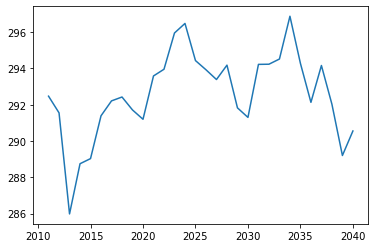

In [38]:
fc=res.forecast(steps=30
               )
fc.plot()

In [33]:
fc

2011    292.472116
2012    291.552608
2013    285.983517
2014    288.749594
2015    289.031632
2016    291.391254
2017    292.212636
2018    292.426407
2019    291.712589
2020    291.199128
2021    293.586681
2022    293.956378
2023    295.954215
2024    296.480911
2025    294.434139
2026    293.927551
2027    293.389995
2028    294.181984
2029    291.828305
2030    291.302382
2031    294.224630
2032    294.233883
2033    294.519698
2034    296.877376
2035    294.277370
2036    292.132961
2037    294.162557
2038    292.029341
2039    289.202391
2040    290.554075
Name: predicted_mean, dtype: float64

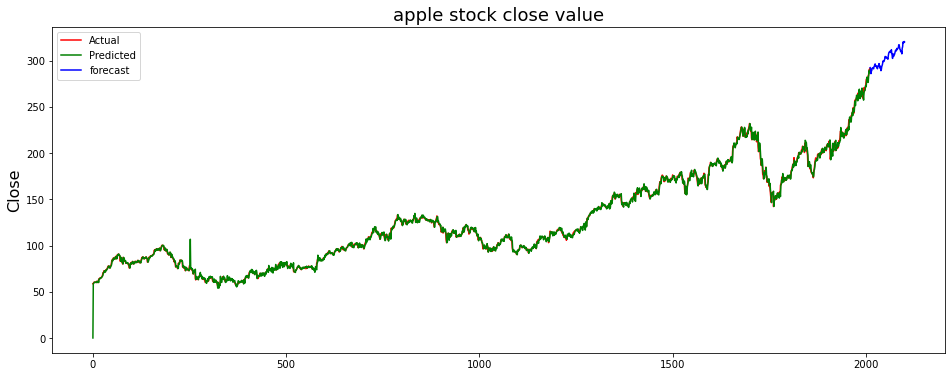

In [36]:
plt.figure(figsize=(16,6))
plt.plot(apple_stk['Close'], label="Actual", color='red')
plt.plot(fs_predictions, label="Predicted", color='green')
plt.plot(fc, label="forecast", color='blue')
plt.title('apple stock close value', fontsize=18)
plt.ylabel('Close', fontsize=16)
plt.legend()

We have observed that got good results with Sarima annual seasonality models, but when we do model with combining train and test final RMSe is more than holts winter method.
So we are considering Holts Winter multiplicative with annual seasonality as final model.